In [211]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

1) DATA VERIFICATION & PROCESSING

In [110]:
df = pd.read_csv('USRealEstateTrends.csv')
df.head()

,RegionID,SizeRank,RegionName,StateName,2018-02-HomeValue,2018-02-DaysPending,2018-02-CutRaw,2018-03-HomeValue,2018-03-DaysPending,2018-03-CutRaw,...,2024-02-CutRaw,2024-03-HomeValue,2024-03-DaysPending,2024-03-CutRaw,2024-04-HomeValue,2024-04-DaysPending,2024-04-CutRaw,2024-05-HomeValue,2024-05-DaysPending,2024-05-CutRaw
0,102001,0,United States,NaN,225746.614318,52.0,7600.0,227155.648994,48.0,8900.0,...,10000.0,357374.362080,42.0,10000.0,359240.114070,38.0,10000.0,360681.294250,37.0,10000.0
1,394913,1,"New York, NY",NY,468313.430126,68.0,16000.0,470102.249154,63.0,19751.5,...,25000.0,646508.747102,55.0,25000.0,652619.099940,51.0,26000.0,657279.223513,47.0,30000.0
2,753899,2,"Los Angeles, CA",CA,629019.165765,33.0,20000.0,636850.139417,31.0,20000.0,...,30000.5,952665.578913,32.0,34000.0,956266.687926,29.0,40012.0,962388.491425,28.0,40000.0
3,394463,3,"Chicago, IL",IL,229741.266973,52.0,8000.0,231317.183706,42.0,9100.0,...,10000.0,316875.294320,29.0,10000.0,319764.144323,25.0,10000.0,321897.252361,23.0,10000.0
4,394514,4,"Dallas, TX",TX,241533.231800,46.0,8562.0,243401.180622,42.0,9900.0,...,10000.0,379972.349667,42.0,10000.0,380957.392395,38.0,10000.0,381103.625851,38.0,10000.0


In [129]:
print(df_cleaned.columns)

Index(['RegionID', 'SizeRank', 'RegionName', 'StateName', '2018-02-HomeValue',
       '2018-02-DaysPending', '2018-02-CutRaw', '2018-03-HomeValue',
       '2018-03-DaysPending', '2018-03-CutRaw',
       ...
       '2024-02-CutRaw', '2024-03-HomeValue', '2024-03-DaysPending',
       '2024-03-CutRaw', '2024-04-HomeValue', '2024-04-DaysPending',
       '2024-04-CutRaw', '2024-05-HomeValue', '2024-05-DaysPending',
       '2024-05-CutRaw'],
      dtype='object', length=232)


In [139]:
df_cleaned.rename(columns=lambda col: col.replace("CutRaw", "PriceCut") if "CutRaw" in col else col, inplace=True)

In [141]:
print(df_cleaned.columns)

Index(['RegionID', 'SizeRank', 'RegionName', 'StateName', '2018-02-HomeValue',
       '2018-02-DaysPending', '2018-02-PriceCut', '2018-03-HomeValue',
       '2018-03-DaysPending', '2018-03-PriceCut',
       ...
       '2024-02-PriceCut', '2024-03-HomeValue', '2024-03-DaysPending',
       '2024-03-PriceCut', '2024-04-HomeValue', '2024-04-DaysPending',
       '2024-04-PriceCut', '2024-05-HomeValue', '2024-05-DaysPending',
       '2024-05-PriceCut'],
      dtype='object', length=232)


In [131]:
print(df_cleaned['RegionName'].unique())

['Dallas, TX' 'Houston, TX' 'Philadelphia, PA' 'Atlanta, GA' 'Phoenix, AZ'
 'Minneapolis, MN' 'Baltimore, MD' 'Orlando, FL' 'Charlotte, NC'
 'Cincinnati, OH' 'Richmond, VA' 'New Orleans, LA' 'Bakersfield, CA'
 'Knoxville, TN' 'Chattanooga, TN' 'Savannah, GA' 'Utica, NY'
 'Johnson City, TN']


In [145]:
df_cleaned[df_cleaned['RegionName'].str.contains('new york', case=False, na=False)]

,RegionID,SizeRank,RegionName,StateName,2018-02-HomeValue,2018-02-DaysPending,2018-02-PriceCut,2018-03-HomeValue,2018-03-DaysPending,2018-03-PriceCut,...,2024-02-PriceCut,2024-03-HomeValue,2024-03-DaysPending,2024-03-PriceCut,2024-04-HomeValue,2024-04-DaysPending,2024-04-PriceCut,2024-05-HomeValue,2024-05-DaysPending,2024-05-PriceCut


In [133]:
df_cleaned[df_cleaned['RegionName'].str.contains('Charlotte', case=False, na=False)]


,RegionID,SizeRank,RegionName,StateName,2018-02-HomeValue,2018-02-DaysPending,2018-02-CutRaw,2018-03-HomeValue,2018-03-DaysPending,2018-03-CutRaw,...,2024-02-CutRaw,2024-03-HomeValue,2024-03-DaysPending,2024-03-CutRaw,2024-04-HomeValue,2024-04-DaysPending,2024-04-CutRaw,2024-05-HomeValue,2024-05-DaysPending,2024-05-CutRaw
23,394458,23,"Charlotte, NC",NC,216161.401546,35.0,8400.0,217823.140728,30.0,9900.0,...,10000.0,382625.496534,31.0,10000.0,384749.010838,29.0,10000.0,386370.804768,28.0,10000.0


In [135]:
df_cleaned[df_cleaned['RegionName'].str.contains('Miami', case=False, na=False)]


,RegionID,SizeRank,RegionName,StateName,2018-02-HomeValue,2018-02-DaysPending,2018-02-CutRaw,2018-03-HomeValue,2018-03-DaysPending,2018-03-CutRaw,...,2024-02-CutRaw,2024-03-HomeValue,2024-03-DaysPending,2024-03-CutRaw,2024-04-HomeValue,2024-04-DaysPending,2024-04-CutRaw,2024-05-HomeValue,2024-05-DaysPending,2024-05-CutRaw


In [137]:
df_cleaned[df_cleaned['RegionName'].str.contains('New York', case=False, na=False)]


,RegionID,SizeRank,RegionName,StateName,2018-02-HomeValue,2018-02-DaysPending,2018-02-CutRaw,2018-03-HomeValue,2018-03-DaysPending,2018-03-CutRaw,...,2024-02-CutRaw,2024-03-HomeValue,2024-03-DaysPending,2024-03-CutRaw,2024-04-HomeValue,2024-04-DaysPending,2024-04-CutRaw,2024-05-HomeValue,2024-05-DaysPending,2024-05-CutRaw


In [153]:
# Filter for North Carolina (NC), New York (NY), and Florida (FL)
nc_cities = df_cleaned[df_cleaned['StateName'] == 'NC']
ny_cities = df_cleaned[df_cleaned['StateName'] == 'NY']
fl_cities = df_cleaned[df_cleaned['StateName'] == 'FL']

# Check if there are any cities found in each state
print(f"Cities in North Carolina (NC): {nc_cities.shape[0]}")
print(f"Cities in New York (NY): {ny_cities.shape[0]}")
print(f"Cities in Florida (FL): {fl_cities.shape[0]}")


Cities in North Carolina (NC): 1
Cities in New York (NY): 1
Cities in Florida (FL): 1


In [155]:
df.isnull().sum()

RegionID                 0
SizeRank                 0
RegionName               0
StateName                1
2018-02-HomeValue        1
                      ... 
2024-04-DaysPending    177
2024-04-CutRaw         234
2024-05-HomeValue        0
2024-05-DaysPending    158
2024-05-CutRaw         174
Length: 232, dtype: int64

In [157]:
df.dropna()

,RegionID,SizeRank,RegionName,StateName,2018-02-HomeValue,2018-02-DaysPending,2018-02-CutRaw,2018-03-HomeValue,2018-03-DaysPending,2018-03-CutRaw,...,2024-02-CutRaw,2024-03-HomeValue,2024-03-DaysPending,2024-03-CutRaw,2024-04-HomeValue,2024-04-DaysPending,2024-04-CutRaw,2024-05-HomeValue,2024-05-DaysPending,2024-05-CutRaw
1,394913,1,"New York, NY",NY,468313.430126,68.0,16000.0,470102.249154,63.0,19751.5,...,25000.0,646508.747102,55.0,25000.0,652619.099940,51.0,26000.0,657279.223513,47.0,30000.0
2,753899,2,"Los Angeles, CA",CA,629019.165765,33.0,20000.0,636850.139417,31.0,20000.0,...,30000.5,952665.578913,32.0,34000.0,956266.687926,29.0,40012.0,962388.491425,28.0,40000.0
3,394463,3,"Chicago, IL",IL,229741.266973,52.0,8000.0,231317.183706,42.0,9100.0,...,10000.0,316875.294320,29.0,10000.0,319764.144323,25.0,10000.0,321897.252361,23.0,10000.0
4,394514,4,"Dallas, TX",TX,241533.231800,46.0,8562.0,243401.180622,42.0,9900.0,...,10000.0,379972.349667,42.0,10000.0,380957.392395,38.0,10000.0,381103.625851,38.0,10000.0
5,394692,5,"Houston, TX",TX,208651.872272,51.0,10000.0,209394.157749,45.0,10000.0,...,10000.0,309138.260511,53.0,10000.0,310167.057071,47.0,10000.0,310706.915311,46.0,10000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,394955,479,"Palatka, FL",FL,106686.723888,64.0,10000.0,106721.670681,95.0,10000.0,...,10000.0,211000.189801,55.0,10000.0,213185.595995,86.0,10000.0,214949.862841,78.0,10000.0
476,394877,491,"Morehead City, NC",NC,262059.754953,78.0,10000.0,262803.655249,79.0,7050.0,...,12100.0,453796.905310,39.0,11500.0,455808.067846,49.0,15000.0,457672.048408,58.0,15000.0
504,394629,520,"Georgetown, SC",SC,229302.947359,77.0,8100.0,230281.137068,81.0,6000.0,...,10055.0,389546.746517,43.0,10500.0,392872.335776,68.0,10000.0,396124.409855,57.0,10000.0
544,394411,561,"Branson, MO",MO,143943.620254,75.0,9000.0,144769.591667,74.0,5100.0,...,5325.0,255085.380274,68.0,5500.0,255423.322460,67.0,10000.0,254828.419318,46.0,7000.0


In [159]:
df.duplicated().sum()

0

In [161]:
df.drop_duplicates()

,RegionID,SizeRank,RegionName,StateName,2018-02-HomeValue,2018-02-DaysPending,2018-02-CutRaw,2018-03-HomeValue,2018-03-DaysPending,2018-03-CutRaw,...,2024-02-CutRaw,2024-03-HomeValue,2024-03-DaysPending,2024-03-CutRaw,2024-04-HomeValue,2024-04-DaysPending,2024-04-CutRaw,2024-05-HomeValue,2024-05-DaysPending,2024-05-CutRaw
0,102001,0,United States,NaN,225746.614318,52.0,7600.0,227155.648994,48.0,8900.0,...,10000.0,357374.362080,42.0,10000.0,359240.114070,38.0,10000.0,360681.294250,37.0,10000.0
1,394913,1,"New York, NY",NY,468313.430126,68.0,16000.0,470102.249154,63.0,19751.5,...,25000.0,646508.747102,55.0,25000.0,652619.099940,51.0,26000.0,657279.223513,47.0,30000.0
2,753899,2,"Los Angeles, CA",CA,629019.165765,33.0,20000.0,636850.139417,31.0,20000.0,...,30000.5,952665.578913,32.0,34000.0,956266.687926,29.0,40012.0,962388.491425,28.0,40000.0
3,394463,3,"Chicago, IL",IL,229741.266973,52.0,8000.0,231317.183706,42.0,9100.0,...,10000.0,316875.294320,29.0,10000.0,319764.144323,25.0,10000.0,321897.252361,23.0,10000.0
4,394514,4,"Dallas, TX",TX,241533.231800,46.0,8562.0,243401.180622,42.0,9900.0,...,10000.0,379972.349667,42.0,10000.0,380957.392395,38.0,10000.0,381103.625851,38.0,10000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,753929,935,"Zapata, TX",TX,117239.787864,NaN,NaN,117590.084777,NaN,NaN,...,NaN,116585.863681,NaN,NaN,118043.845001,NaN,NaN,119697.355634,NaN,NaN
891,394743,936,"Ketchikan, AK",AK,296669.873256,NaN,NaN,299776.694492,NaN,NaN,...,NaN,387319.314967,NaN,NaN,388840.396336,NaN,NaN,389962.681122,NaN,NaN
892,753874,937,"Craig, CO",CO,168760.073073,NaN,NaN,169634.403620,NaN,NaN,...,NaN,285342.615851,NaN,NaN,286124.694239,NaN,NaN,287028.957463,NaN,NaN
893,395188,938,"Vernon, TX",TX,70971.082716,NaN,NaN,71692.233288,NaN,NaN,...,NaN,90770.425466,NaN,NaN,91504.904635,NaN,NaN,92149.470030,NaN,NaN


In [163]:
# city = 'Charlotte, NC'
# city = 'Miami, FL'
# city = 'New York, NY'
home_value = 750000  

EACH CITY NEEDS TO BE CLEANED + ALIGNED W/ COLUMNS ALLOCATED

In [168]:
# Target vs. Current Search 
states = ['North Carolina', 'Florida', 'New York']
state_data = {}

# We only want the clean data
for state_name in states:
    # Filter by state
    state = df_cleaned[df_cleaned['StateName'] == state_name]
    
    #Confirmatioin of data
    if state.empty:
        print(f"No data available for the state: {state_name}")
        continue  # Skip this state and move to the next one

    
    state_data[state_name] = state['PriceCut']  # Replace 'PriceCut' with the relevant column

# Plotting the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=list(state_data.values()), labels=state_data.keys(), palette='Set2')

plt.title('Price Distribution for Selected States', fontsize=14)
plt.xlabel('States', fontsize=12)
plt.ylabel('Price Cut (USD)', fontsize=12)
plt.grid(True)
plt.show()


No data available for the state: North Carolina
No data available for the state: Florida
No data available for the state: New York


IndexError: list index out of range

<Figure size 1000x600 with 0 Axes>

NEED HOME VALUE

In [186]:
home_value_cols = [col for col in df_cleaned.columns if 'HomeValue' in col]
print(home_value_cols)  # Check the column names


['2018-02-HomeValue', '2018-03-HomeValue', '2018-04-HomeValue', '2018-05-HomeValue', '2018-06-HomeValue', '2018-07-HomeValue', '2018-08-HomeValue', '2018-09-HomeValue', '2018-10-HomeValue', '2018-11-HomeValue', '2018-12-HomeValue', '2019-01-HomeValue', '2019-02-HomeValue', '2019-03-HomeValue', '2019-04-HomeValue', '2019-05-HomeValue', '2019-06-HomeValue', '2019-07-HomeValue', '2019-08-HomeValue', '2019-09-HomeValue', '2019-10-HomeValue', '2019-11-HomeValue', '2019-12-HomeValue', '2020-01-HomeValue', '2020-02-HomeValue', '2020-03-HomeValue', '2020-04-HomeValue', '2020-05-HomeValue', '2020-06-HomeValue', '2020-07-HomeValue', '2020-08-HomeValue', '2020-09-HomeValue', '2020-10-HomeValue', '2020-11-HomeValue', '2020-12-HomeValue', '2021-01-HomeValue', '2021-02-HomeValue', '2021-03-HomeValue', '2021-04-HomeValue', '2021-05-HomeValue', '2021-06-HomeValue', '2021-07-HomeValue', '2021-08-HomeValue', '2021-09-HomeValue', '2021-10-HomeValue', '2021-11-HomeValue', '2021-12-HomeValue', '2022-01-Hom

In [194]:
years = sorted(set([col[:4] for col in df_cleaned.columns if 'HomeValue' in col]))

EDA: 

In [85]:
df_cleaned = df.dropna()
numeric_cols = df_cleaned.select_dtypes(include=[np.number]).columns
df_numeric = df_cleaned[numeric_cols]
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1
df_numeric_cleaned = df_numeric[~((df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))).any(axis=1)]
df_cleaned = df_cleaned.loc[df_numeric_cleaned.index]
print('Data Cleaning AS EXPECTED')

Data Cleaning AS EXPECTED


DATA ENTIRE POPULATION: HOME VALUE BOX-PLOT (display distribution of avg. home value 2018-2024

1) USING FOR-LOOP: We will need to take ONLY the home value columns for this distribution

In [217]:
# Extract the year format from column names (e.g., '2018', '2019', etc.)
years = sorted(set([col[:4] for col in df_cleaned.columns if 'HomeValue' in col]))

boxplot_data = []

for year in years:
    # Collect home values for each city in the given year
    year_home_values = []
    for city_name in cities:
        city_data = df_cleaned[df_cleaned['RegionName'] == city_name]
        home_value_col = f"{year}-02-HomeValue"  # Use any month (e.g., '02') for that year
        if home_value_col in city_data.columns:
            year_home_values.append(city_data[home_value_col].values)
        else:
            year_home_values.append(np.nan)  # Append NaN if no data available for that year

    boxplot_data.append(year_home_values)

2) var_name & value_name to paint a picture (easier use of dependent variable analysis)

3) color_map can be used: RED TO IDENTIFY HIGH PRICES & BLUE TO DEFINE LOWER PRICES

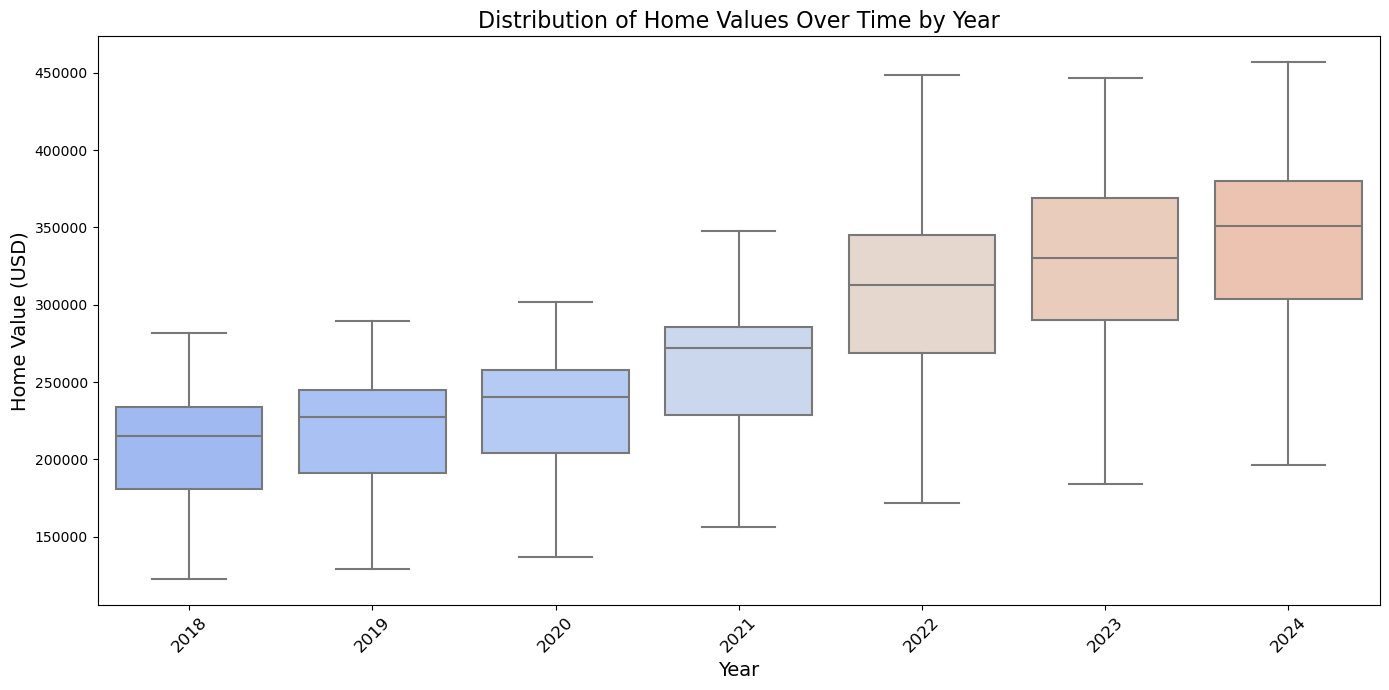

In [224]:
flat_home_values = [value for sublist in boxplot_data for value in sublist if not np.isnan(value)]
norm = Normalize(vmin=np.min(flat_home_values), vmax=np.max(flat_home_values))  
cmap = plt.get_cmap("coolwarm")  

# Mean home values since my cities weren't available but the data was useful
color_map = [ScalarMappable(norm=norm, cmap=cmap).to_rgba(np.mean(home_values)) for home_values in boxplot_data]

plt.figure(figsize=(14, 7))

###sns.boxplot generates color palette
sns.boxplot(data=boxplot_data, palette=color_map)

plt.xticks(ticks=range(len(years)), labels=years, rotation=45, fontsize=12)
plt.title('Distribution of Home Values Over Time by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Home Value (USD)', fontsize=14)
plt.tight_layout()
plt.show()

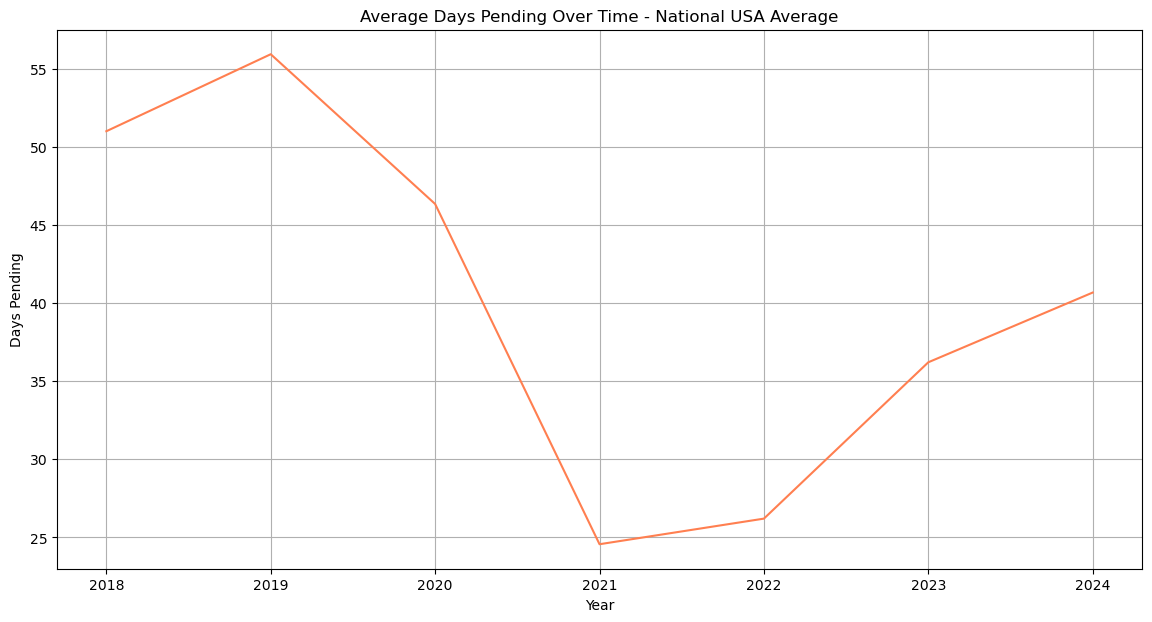

In [174]:
days_pending_cols = [col for col in df.columns if 'DaysPending' in col]
days_pending_mean = df_cleaned[days_pending_cols].mean()
days_pending_mean.index = [col[:4] for col in days_pending_mean.index]
days_pending_mean_by_year = days_pending_mean.groupby(days_pending_mean.index).mean()

plt.figure(figsize=(14, 7))
days_pending_mean_by_year.plot(color='coral')
plt.title('Average Days Pending Over Time - National USA Average')
plt.xlabel('Year')
plt.ylabel('Days Pending')
plt.grid(True)
plt.show()

In [230]:
# Extract columns related to Home Value
home_values_cols = [col for col in df_cleaned.columns if 'HomeValue' in col]

# Calculate the mean for each of the HomeValue columns
home_values_mean = df_cleaned[home_values_cols].mean()

# Extract the year from the column names and assign it as the index
home_values_mean.index = [col[:4] for col in home_values_mean.index]

# Group by year and calculate the mean home value per year
home_values_mean_by_year = home_values_mean.groupby(home_values_mean.index).mean()

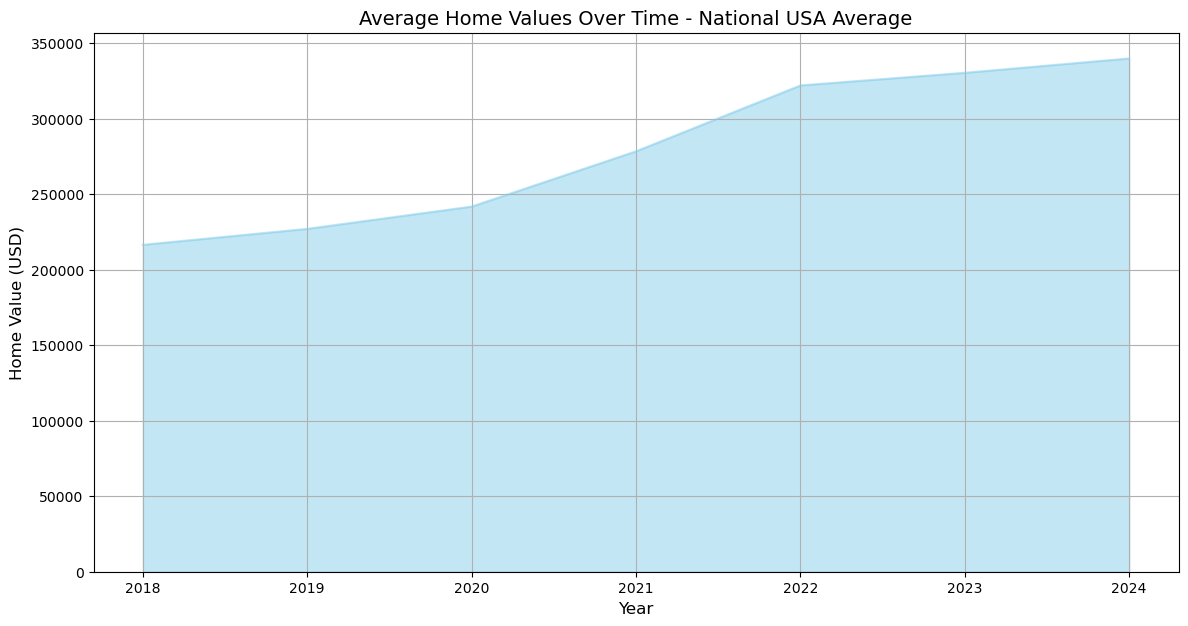

In [228]:

plt.figure(figsize=(14, 7))
home_values_mean_by_year.plot(kind='area', color='skyblue', alpha=0.5)

# Add titles and labels
plt.title('Average Home Values Over Time - National USA Average', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Home Value (USD)', fontsize=14)

# Display the grid
plt.grid(True)

# Show the plot
plt.show()
